
## Pavel Makarov

## Combined SQL database generation 

In [87]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [121]:
# Create a connection to a database
conn = sqlite3.connect('MA_property_data.db')

In [122]:
# Create a cursor
cursor = conn.cursor()

### Check all data sets from previous milestones if they are ready to be uploaded to the data base and what common keys can be used for merging

In [123]:
# Open housing prices table
df_prices = pd.read_csv('Massachusetts_sfh_aver_prices_2010-1019.csv')

In [124]:
# Print out the table
df_prices

,Year,Yearly_Average_Price
0,2010,302030.4085
1,2011,291279.6268
2,2012,284850.8186
3,2013,300503.3836
4,2014,318720.0174
5,2015,334202.9773
6,2016,355527.4546
7,2017,379216.0459
8,2018,402953.4278
9,2019,414290.2468


In [125]:
# Print out information about the table
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10 non-null     int64  
 1   Yearly_Average_Price  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [126]:
# Open file with demographic data by race
df_race = pd.read_csv('Race_MA_2010_2019.csv')

In [127]:
# Check first five rows
df_race.head()

,Year,Race,Percent,Count
0,2010,American Indian/Alaskan Native,0.18%,"11,719"
1,2010,Asian,5.46%,"358,233"
2,2010,Black,6.39%,"419,841"
3,2010,Hispanic,9.66%,"634,029"
4,2010,Native Hawaiian/Other Pacific Islander,0.04%,"2,489"


In [128]:
# Print out information about the table
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     70 non-null     int64 
 1   Race     70 non-null     object
 2   Percent  70 non-null     object
 3   Count    70 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


In [129]:
# Open population related file
df_pop = pd.read_csv('Massachusetts_population_2010-1019.csv')

In [130]:
# Check first five rows of the table
df_pop.head()

,Year,Population
0,2010,6566440
1,2011,6614218
2,2012,6664269
3,2013,6715158
4,2014,6764864


In [131]:
# Print out information about the table
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        10 non-null     int64
 1   Population  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [132]:
# Open file with demographic change information
df_pop_change = pd.read_csv('Population_MA.csv')


In [133]:
# Check first five rows of the table
df_pop_change.head()

,Unnamed: 0,Census_Year,Percent change
0,22,2010,3.1%
1,23,2020,7.4%


In [134]:
# Print out information about the table
df_pop_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2 non-null      int64 
 1   Census_Year     2 non-null      int64 
 2   Percent change  2 non-null      object
dtypes: int64(2), object(1)
memory usage: 180.0+ bytes


In [135]:
# Open crimes information file
df_crime_html = pd.read_csv('MA_Crime_reports_2010-2019.csv')

In [179]:
# Check first five rows of the table
df_crime_html.head()

,year,Violentcrime,Murder andnonnegligentmanslaughter,Forciblerape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larceny-theft,Motorvehicletheft,Arson1
0,2010,28812.0,208,1667.0,6496.0,20532.0,144968.0,36050.0,97804.0,11114.0,635.0
1,2011,26269.0,180,1492.0,6316.0,18281.0,133898.0,33662.0,89994.0,10242.0,511.0
2,2012,25806.0,119,1526.0,6363.0,17798.0,131849.0,32257.0,90700.0,8892.0,561.0
3,2013,24031.0,124,1680.0,299.0,5903.0,16025.0,122430.0,27392.0,86600.0,8438.0
4,2014,24409.0,129,1489.0,308.0,5744.0,16739.0,112550.0,22758.0,82027.0,7847.0


In [137]:
# Print out information about the table
df_crime_html.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                9 non-null      int64  
 1   Violentcrime                        9 non-null      float64
 2   Murder andnonnegligentmanslaughter  9 non-null      int64  
 3   Forciblerape                        9 non-null      float64
 4   Robbery                             9 non-null      float64
 5   Aggravatedassault                   9 non-null      float64
 6   Propertycrime                       9 non-null      float64
 7   Burglary                            9 non-null      float64
 8   Larceny-theft                       9 non-null      float64
 9   Motorvehicletheft                   9 non-null      float64
 10  Arson1                              9 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 924.0 bytes

In [138]:
# Open crimes by town crime rates file
df_crime_API = pd.read_csv('cleaned_propert_crimes_2010_2019.csv')

In [196]:
# Check first five rows of the table
df_crime_API.head()

,year,property-crime Barnstable Police Department,property-crime Bourne Police Department,property-crime Brewster Police Department,property-crime Chatham Police Department,property-crime Dennis Police Department,property-crime Eastham Police Department,property-crime Falmouth Police Department,property-crime Harwich Police Department,property-crime Mashpee Police Department,...,property-crime State Police: Franklin County,property-crime State Police: Hampden County,property-crime State Police: Hampshire County,property-crime State Police: Middlesex County,property-crime State Police: Nantucket County,property-crime State Police: Norfolk County,property-crime State Police: Plymouth County,property-crime State Police: Suffolk County,property-crime State Police: Worcester County,property-crime Wampanoag Tribe of Gay Head
0,2010,1327,661,224,173,637,73,1168,271,368,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN
1,2011,1280,537,223,126,539,156,1069,283,331,...,0,19,2,3.0,NaN,3,2.0,NaN,2,NaN
2,2012,1269,542,168,170,527,127,1064,249,293,...,0,28,3,0.0,NaN,1,1.0,NaN,1,3.0
3,2013,1190,465,132,123,505,100,899,251,284,...,1,12,0,1.0,NaN,5,NaN,14.0,1,NaN
4,2014,1083,309,115,120,361,88,760,205,237,...,0,5,5,NaN,NaN,0,NaN,NaN,2,NaN


In [140]:
# Print out information about the table
df_crime_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 397 entries, year to property-crime Wampanoag Tribe of Gay Head
dtypes: float64(92), int64(305)
memory usage: 31.1 KB


## Uploading tables into the database

In [141]:
# Upload prices table to the database using sqlite3 and connected database
df_prices.to_sql('prices', conn, if_exists='append')

10

In [142]:
# Upload race table to the database using sqlite3 and connected database
df_race.to_sql('race', conn, if_exists='append')

70

In [143]:
# Upload population table to the database using sqlite3 and connected database
df_pop.to_sql('population', conn, if_exists='append')

10

In [144]:
# Upload population change table to the database using sqlite3 and connected database
df_pop_change.to_sql('population_change', conn, if_exists='append')

2

In [145]:
# Upload crimes table to the database using sqlite3 and connected database
df_crime_html.to_sql('crimes', conn, if_exists='append')

9

In [146]:
# Upload property crimes by town table to the database using sqlite3 and connected database
df_crime_API.to_sql('property_crimes', conn, if_exists='append')

10

In [147]:
# Commit the chnages to the data base
conn.commit()

## Combining tables from the database into one using year as a common key

In [148]:
# Create a query to join all table in the data base by corresponding year information

query = """
        SELECT *
        FROM prices
        LEFT JOIN race ON prices.Year = race.Year
        LEFT JOIN population ON prices.Year = population.Year
        LEFT JOIN population_change ON prices.Year = population_change.Census_Year
        LEFT JOIN crimes ON prices.Year = crimes.year
        LEFT JOIN property_crimes ON prices.Year = property_crimes.year
        """

In [149]:
# Create a variable that stores joined tables and fetch all rows in it
combined = cursor.execute(query)
rows = combined.fetchall()

In [150]:
# Cretate a list of columns from the joined table description
columns = [col[0] for col in combined.description]

In [151]:
# using pandas create a combined data frame
df = pd.DataFrame(rows, columns=columns)

In [152]:
# check first five rows
df.head()

,index,Year,Yearly_Average_Price,index,Year,Race,Percent,Count,index,Year,...,property-crime State Police: Franklin County,property-crime State Police: Hampden County,property-crime State Police: Hampshire County,property-crime State Police: Middlesex County,property-crime State Police: Nantucket County,property-crime State Police: Norfolk County,property-crime State Police: Plymouth County,property-crime State Police: Suffolk County,property-crime State Police: Worcester County,property-crime Wampanoag Tribe of Gay Head
0,0,2010,302030.4085,0,2010,American Indian/Alaskan Native,0.18%,"11,719",0,2010,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN
1,0,2010,302030.4085,1,2010,Asian,5.46%,"358,233",0,2010,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN
2,0,2010,302030.4085,2,2010,Black,6.39%,"419,841",0,2010,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN
3,0,2010,302030.4085,3,2010,Hispanic,9.66%,"634,029",0,2010,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN
4,0,2010,302030.4085,4,2010,Native Hawaiian/Other Pacific Islander,0.04%,"2,489",0,2010,...,1,51,2,7.0,NaN,5,4.0,NaN,0,NaN


In [153]:
# Check the inforamtion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 425 entries, index to property-crime Wampanoag Tribe of Gay Head
dtypes: float64(108), int64(313), object(4)
memory usage: 232.6+ KB


## Data Visualization. Plots 2 and 4 were built based on data from separate tables

### Plot 1 - Line chart. Chnge the average real estate price by year

<function matplotlib.pyplot.show(close=None, block=None)>

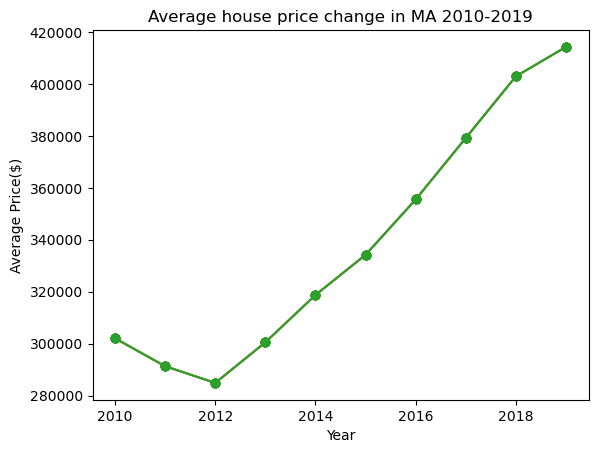

In [154]:
# Using matplotlib create a line plot with Year inforamtion vs average property prices
plt.plot(df['Year'], df['Yearly_Average_Price'], marker='o', linestyle='-')

# Assign title and axis
plt.title('Average house price change in MA 2010-2019')
plt.xlabel('Year')
plt.ylabel('Average Price($)')

# Display the plot
plt.show

### Plot 2 - Scatter plot. Property crime vs Average price. 

<function matplotlib.pyplot.show(close=None, block=None)>

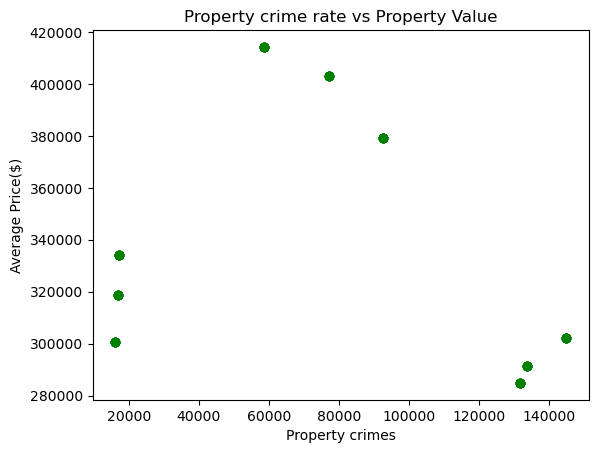

In [155]:
# Create a scatter plot 
plt.scatter(df['Propertycrime'], df['Yearly_Average_Price'], marker='o', linestyle='-', color = 'green')
plt.title('Property crime rate vs Property Value')
plt.xlabel('Property crimes')
plt.ylabel('Average Price($)')
plt.show

### Plot 3 - Bar graph. Count by race

In [156]:
# Convert the count column to numeric and Race column to string
df['Count'] = df['Count'].replace(',', '', regex=True).apply(pd.to_numeric)
df['Race'] = df['Race'].astype(str)

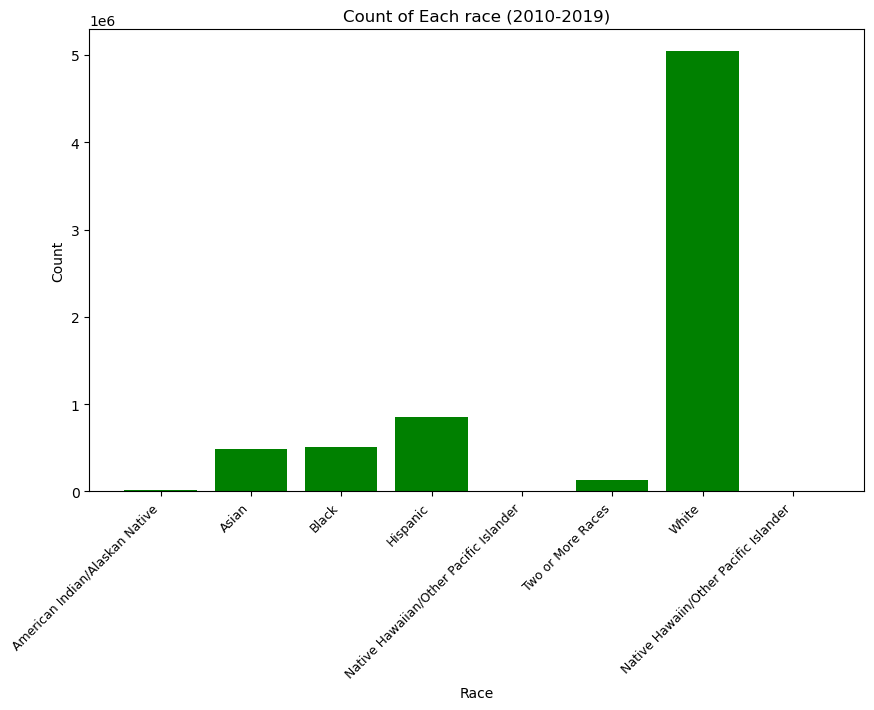

In [157]:
# Create a bar graph
plt.figure(figsize=(10,6))

plt.bar(df['Race'], df['Count'], color='green')

# Assign labels and title
plt.title('Count of Each race (2010-2019)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(fontsize =(9), rotation = 45, ha = 'right')
# Display the plot
plt.show()

### Plot 4 -  Bar graph. % population by race. 

In [158]:
# Create a subset dataframe
df_grouped_race = df[['year', 'Race', 'Count']]


In [160]:
# Using group by function group the data by race
df_grouped_race = df_grouped_race.groupby('Race').sum()

In [161]:
# Drop year column
df_grouped_race.drop('year',axis = 1, inplace = True)

In [162]:
# Check the table
df_grouped_race


,Count
Race,
American Indian/Alaskan Native,121006
Asian,4264411
Black,4650982
Hispanic,7491782
Native Hawaiian/Other Pacific Islander,2489
Native Hawaiin/Other Pacific Islander,24680
Two or More Races,1142859
White,49889986


In [163]:
# Create a population variable 
df_popul = df['Population']

In [166]:
# Sum all population to get total count from 2010 to 2019
df_popul = df_popul.sum()

In [169]:
# Create a percentage column by devident count by race by total population and multiplying by 100
df_grouped_race["Percentage"] = df_grouped_race['Count']/df_popul *100

In [174]:
# Reset the index so race column is not used as index 
df_grouped_race = df_grouped_race.reset_index()

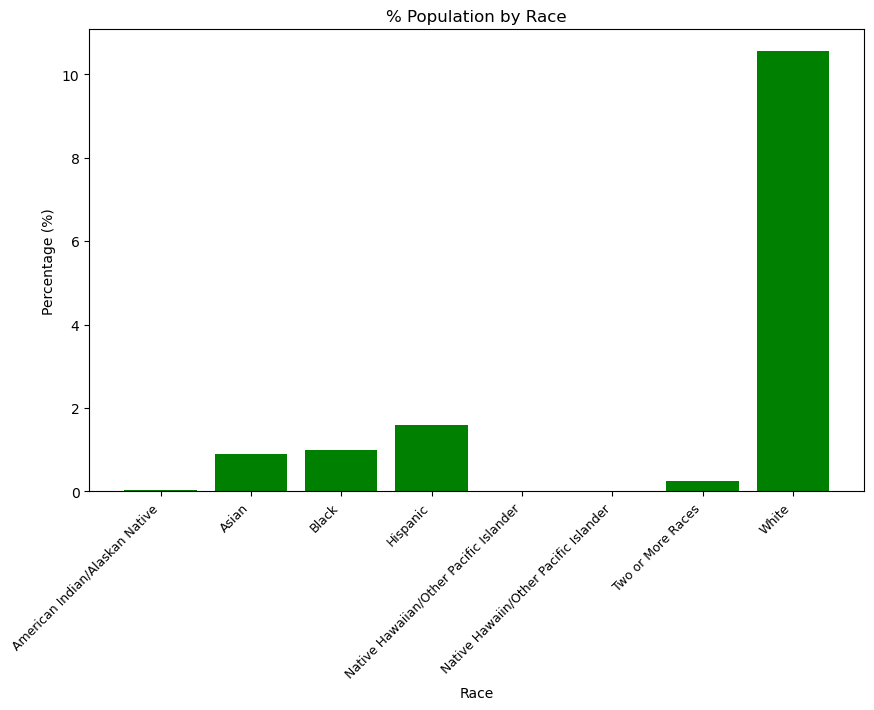

In [175]:

# Plot a bar graph
plt.figure(figsize=(10,6))

plt.bar(df_grouped_race['Race'], df_grouped_race['Percentage'], color='green')

# Adding labels and title
plt.title('% Population by Race')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(fontsize =(9), rotation = 45, ha = 'right')
# Display the plot
plt.show()

### Plot 5 - Line plot. Robberies, Property crimes and Burglaries in MA by Year. Plot a scatter plot for different types of crime change by year. Please note that the crimes for 2016 were not reported.

<function matplotlib.pyplot.show(close=None, block=None)>

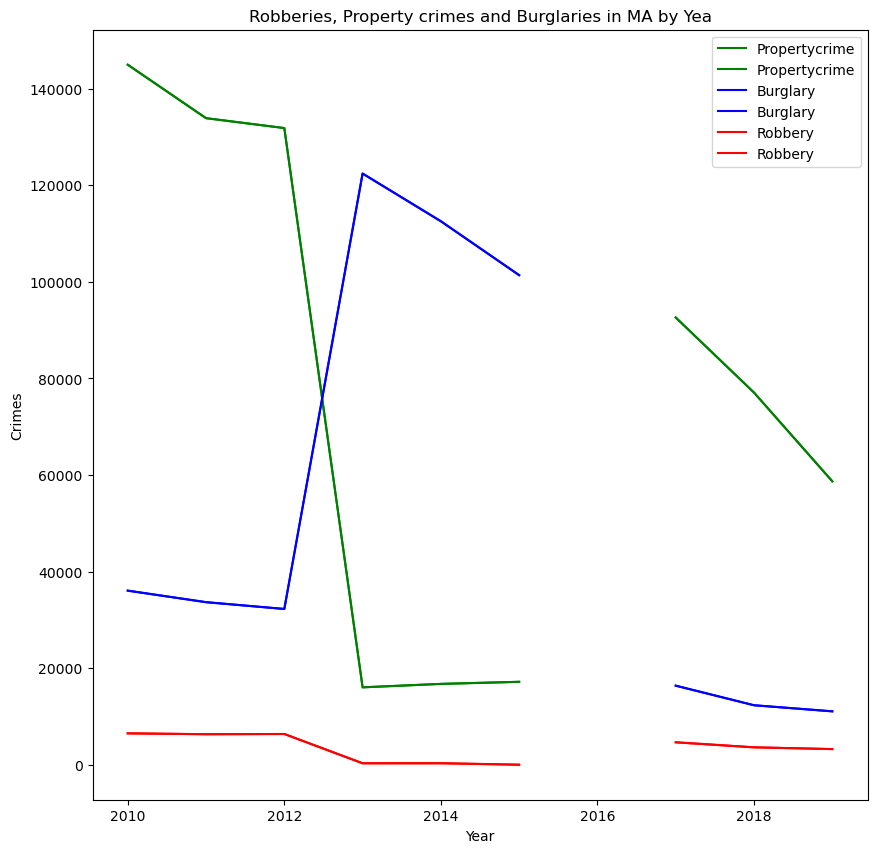

In [206]:
# Using matplot plot a line graph for 3 types of crimes
plt.figure(figsize = (10,10))
plt.plot(df['year'], df['Propertycrime'], label='Propertycrime', color = 'green')
plt.plot(df['year'], df['Burglary'], label='Burglary', color = 'blue')
plt.plot(df['year'], df['Robbery'], label='Robbery', color = 'red') 
    
plt.title('Robberies, Property crimes and Burglaries in MA by Yea')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.legend()
plt.show

In [205]:
# Close connection
conn.close()
